### COVID 19 data plotter - experimental phase


### Example based on code at 
[scitools.org.uk](https://scitools.org.uk/cartopy/docs/latest/gallery/hurricane_katrina.html#sphx-glr-gallery-hurricane-katrina-py)

### Used support from Stackoverflow to make the state-by-state colorization

[Link to the Stackoverflow](https://stackoverflow.com/questions/53290602/how-to-use-cartopy-to-create-colored-us-states)

### I never used type set before, here it was useful to get from the data table
### unique state names, rather than a long list with repeating names

[see link for sets in Python](https://pythonspot.com/python-set/)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Reading the csv file right from the GitHub page
### (It works with the package pandas!)

In [2]:
url="https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv"


df=pd.read_csv(url)
df.set_index("UID")
df.shape

(3255, 97)

In [3]:
def get_column_index(df,name):
    """ returns the column index for the given name (string)
    
    This function works case insensitive.
    """
    index=-9
    for j,c in enumerate(df.columns):
        if c.lower()==name.lower():
            index=j
        
    return index

def get_all_state_names(df):
    """ returns all states names from the table"""
    return set([name for name in df['Province_State']])


In [7]:


day=pd.datetime(2020,4,16)

coldate="{0}/{1}/{2}".format(day.month,day.day,day.year-2000)
#coldate=pd.datetime.strftime(day,'%m/%d/%y') # contains leading zeros, though

#icol=get_column_index(test,coldate)
#icol
state_set=get_all_state_names(df)

print(state_set)

{'Vermont', 'Iowa', 'Ohio', 'Maine', 'Oklahoma', 'Arkansas', 'South Carolina', 'Rhode Island', 'Kentucky', 'Virginia', 'North Dakota', 'Mississippi', 'Indiana', 'Louisiana', 'Illinois', 'New York', 'Grand Princess', 'Connecticut', 'Massachusetts', 'Minnesota', 'Washington', 'New Mexico', 'Michigan', 'American Samoa', 'Alaska', 'Virgin Islands', 'Guam', 'Nevada', 'Pennsylvania', 'Hawaii', 'Missouri', 'Arizona', 'Wyoming', 'North Carolina', 'Northern Mariana Islands', 'Diamond Princess', 'Maryland', 'New Hampshire', 'Colorado', 'District of Columbia', 'Kansas', 'California', 'Utah', 'Wisconsin', 'West Virginia', 'South Dakota', 'Texas', 'Alabama', 'Florida', 'Puerto Rico', 'Georgia', 'Montana', 'Delaware', 'Idaho', 'Tennessee', 'Oregon', 'New Jersey', 'Nebraska'}


In [8]:
# We create a dictionary with each state name and the current total count number
# 
state_total={}

i=0
for name in state_set:
    sdf=df.groupby("Province_State").get_group(name)
    sdf.set_index('Admin2')
    count=sdf[coldate].values
    state_total[name]=count.sum() 
    # we appended a new key and assign the value (state name as string is the key, the value is the counted number)
    print(i,name,state_total[name])
    i+=1


0 Vermont 774
1 Iowa 2141
2 Ohio 8414
3 Maine 796
4 Oklahoma 2357
5 Arkansas 1620
6 South Carolina 3931
7 Rhode Island 3529
8 Kentucky 2435
9 Virginia 6889
10 North Dakota 393
11 Mississippi 3624
12 Indiana 9542
13 Louisiana 22532
14 Illinois 25734
15 New York 223691
16 Grand Princess 103
17 Connecticut 15884
18 Massachusetts 32181
19 Minnesota 1809
20 Washington 11057
21 New Mexico 1484
22 Michigan 28809
23 American Samoa 0
24 Alaska 300
25 Virgin Islands 51
26 Guam 135
27 Nevada 3214
28 Pennsylvania 28258
29 Hawaii 530
30 Missouri 5174
31 Arizona 4237
32 Wyoming 296
33 North Carolina 5639
34 Northern Mariana Islands 13
35 Diamond Princess 49
36 Maryland 10784
37 New Hampshire 1139
38 Colorado 8286
39 District of Columbia 2350
40 Kansas 1615
41 California 27677
42 Utah 2683
43 Wisconsin 3875
44 West Virginia 728
45 South Dakota 1311
46 Texas 16876
47 Alabama 4345
48 Florida 23343
49 Puerto Rico 1043
50 Georgia 15669
51 Montana 415
52 Delaware 2070
53 Idaho 1587
54 Tennessee 6375
55 Or

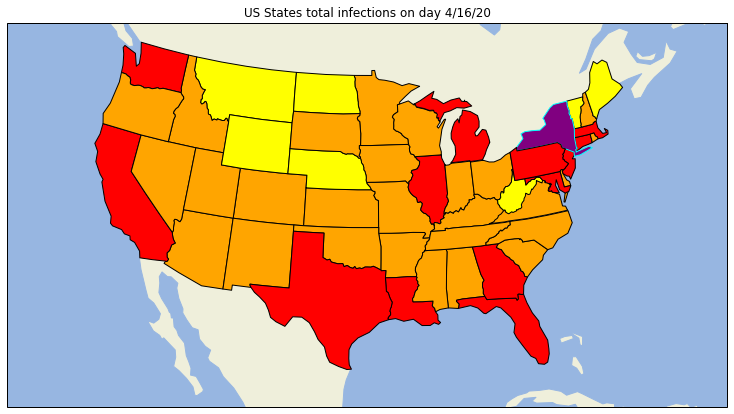

In [9]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import shapely.geometry as sgeom

import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader

fig = plt.figure(figsize=[10,10])
ax = fig.add_axes([0, 0, 1, 1], projection=ccrs.LambertConformal())

ax.set_extent([-125, -66.5, 20, 50], ccrs.Geodetic())

shapename = 'admin_1_states_provinces_lakes_shp'
states_shp = shpreader.natural_earth(resolution='110m',
                                     category='cultural', name=shapename)



# to get the effect of having just the states without a map "background"
# turn off the outline and background patches
ax.background_patch.set_visible(True)
ax.outline_patch.set_visible(True)

ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.set_title('US States total infections on day '+coldate)



for astate in shpreader.Reader(states_shp).records():
    
    name=astate.attributes['name']
    value=state_total[name]
    #print (name)
    #print(i,name,state_total[name])
    if value<1E7:
        facecolor = 'pink'
    if value<1E6:
        facecolor = 'purple'
    if value<1E5:
        facecolor = 'red'
    if value<1E4:
        facecolor = 'orange'
    if value<1E3:
        facecolor = 'yellow'
    if value<1E2:
        facecolor = 'lightblue'
    if value<1E1:
        facecolor = 'darkgray'
    if value==0:
        facecolor = 'lightgreen'
    # we use the shapefiles attribute name and hope it matches the state names that we have in teh  spreadsheet table
    
    if astate.attributes['name'] == "New York":
        #print(astate.attributes)
        ax.add_geometries(
            [astate.geometry],
            ccrs.PlateCarree(),
            facecolor=facecolor, edgecolor='cyan')
    else:
        ax.add_geometries(
        [astate.geometry],
            ccrs.PlateCarree(),
            facecolor=facecolor, edgecolor='black')
        pass
    # make two proxy artists to add to a legend
    ###direct_hit = mpatches.Rectangle((0, 0), 1, 1, facecolor="red")
    ###within_2_deg = mpatches.Rectangle((0, 0), 1, 1, facecolor="#FF7E00")
    ###labels = ['State directly intersects\nwith track',
    ###          'State is within \n2 degrees of track']
    ###ax.legend([direct_hit, within_2_deg], labels,
    ###          loc='lower left', bbox_to_anchor=(0.025, -0.1), fancybox=True)
plt.show()

#Todo: add a slider for the date and make plot interactive
# or animation html5 file